In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('phone_data.csv', 
                 index_col=0, 
                 infer_datetime_format=True,
                 parse_dates=['date'],
                 dayfirst=True                 
                 )
df.head()


,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [12]:
df.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [13]:
df.describe()

,duration
count,830.000000
mean,117.804036
std,444.129560
min,1.000000
25%,1.000000
50%,24.500000
75%,55.000000
max,10528.000000


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


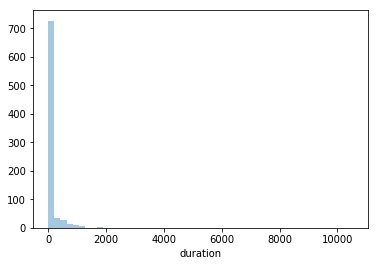

In [23]:
sns.distplot(df.duration, kde=False)

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


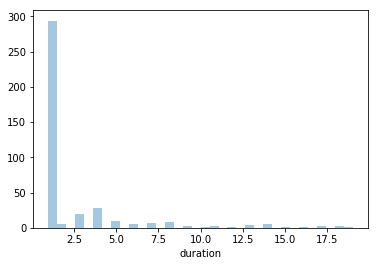

In [24]:
df_short_calls = df[df['duration'] < 20]  # calls shorter than 20 minutes
sns.distplot(df_short_calls.duration, kde=False)

In [26]:
df.groupby('network').describe()

duration                                                             \
             count        mean           std     min     25%     50%      75%   
network                                                                         
Meteor        87.0   83.137931  1.696903e+02   1.000   1.000   5.000   75.000   
Tesco         84.0  164.773810  2.274716e+02   1.000   4.000  72.500  219.500   
Three        215.0  170.004651  3.683116e+02   1.000   1.000   4.000  107.000   
Vodafone     215.0   68.697674  2.325271e+02   1.000   1.000   1.000    5.000   
data         150.0   34.429000  6.416308e-14  34.429  34.429  34.429   34.429   
landline      42.0  438.880952  1.631416e+03   3.000  15.750  75.000  200.750   
special        3.0    1.000000  0.000000e+00   1.000   1.000   1.000    1.000   
voicemail     27.0   65.740741  4.429498e+01   1.000  28.000  63.000   97.000   
world          7.0    1.000000  0.000000e+00   1.000   1.000   1.000    1.000   

                      
                 max  
network               
Meteor      1090.000  
Tesco       1234.000  
Three       2328.000  
Vodafone    1859.000  
data          34.429  
landline   10528.000  
special        1.000  
voicemail    174.000  
world          1.000

In [146]:
df_group_nw = df.groupby('network')
df_group_nw.count()

,date,duration,item,month,network_type
network,,,,,
Meteor,87,87,87,87,87
Tesco,84,84,84,84,84
Three,215,215,215,215,215
Vodafone,215,215,215,215,215
data,150,150,150,150,150
landline,42,42,42,42,42
special,3,3,3,3,3
voicemail,27,27,27,27,27
world,7,7,7,7,7


In [147]:
df_group_nw.groups

{'Meteor': Int64Index([  2,  11,  12,  16,  60,  65,  84, 100, 109, 118, 119, 139, 140,
             141, 143, 144, 148, 149, 150, 164, 204, 205, 206, 251, 257, 264,
             265, 266, 273, 276, 290, 293, 294, 295, 296, 297, 306, 315, 316,
             317, 318, 319, 342, 349, 356, 362, 373, 402, 403, 404, 407, 408,
             415, 423, 425, 430, 439, 440, 460, 461, 469, 470, 471, 472, 497,
             498, 507, 508, 524, 532, 535, 542, 543, 544, 556, 564, 572, 573,
             599, 600, 632, 654, 722, 741, 781, 792, 802],
            dtype='int64', name='index'),
 'Tesco': Int64Index([  3,   4,   5,  14,  15,  21,  27,  41,  50,  61,  78,  83,  86,
              94, 105, 110, 113, 128, 130, 146, 168, 184, 190, 250, 261, 272,
             274, 299, 300, 302, 327, 345, 353, 358, 368, 375, 406, 413, 416,
             417, 421, 422, 424, 428, 438, 442, 455, 475, 527, 545, 547, 597,
             603, 612, 615, 618, 619, 620, 631, 639, 644, 662, 665, 666, 668,
             669, 671,

In [150]:
df_group_nw.mean()

,duration
network,
Meteor,83.137931
Tesco,164.773810
Three,170.004651
Vodafone,68.697674
data,34.429000
landline,438.880952
special,1.000000
voicemail,65.740741
world,1.000000


In [149]:
df_group_nw.max()

,date,duration,item,month,network_type
network,,,,,
Meteor,2015-12-01 12:01:00,1090.000,sms,2015-03,mobile
Tesco,2015-12-02 20:51:00,1234.000,sms,2015-03,mobile
Three,2015-12-01 18:23:00,2328.000,sms,2015-03,mobile
Vodafone,2015-12-01 18:26:00,1859.000,sms,2015-03,mobile
data,2015-12-03 06:58:00,34.429,data,2015-03,data
landline,2015-12-02 20:15:00,10528.000,call,2015-03,landline
special,2015-04-02 17:04:00,1.000,sms,2015-02,special
voicemail,2015-06-02 10:36:00,174.000,call,2015-03,voicemail
world,2015-03-14 00:16:00,1.000,sms,2015-03,world


In [154]:
df[df.item == 'call'].groupby('network').mean()

,duration
network,
Meteor,133.333333
Tesco,194.760563
Three,284.875000
Vodafone,221.530303
landline,438.880952
voicemail,65.740741


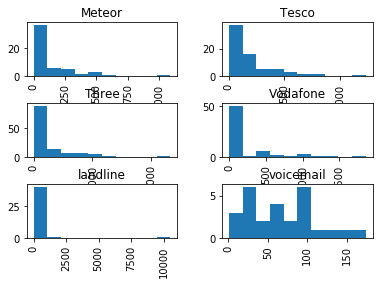

In [32]:
df[df.item == 'call'].duration.hist(by=df.network)
plt.show()

In [172]:
df.groupby(['network', 'item']).count()

date  duration  month  network_type
network   item                                     
Meteor    call    54        54     54            54
          sms     33        33     33            33
Tesco     call    71        71     71            71
          sms     13        13     13            13
Three     call   128       128    128           128
          sms     87        87     87            87
Vodafone  call    66        66     66            66
          sms    149       149    149           149
data      data   150       150    150           150
landline  call    42        42     42            42
special   sms      3         3      3             3
voicemail call    27        27     27            27
world     sms      7         7      7             7

In [173]:
df.groupby(['network', 'item']).mean()

duration
network   item            
Meteor    call  133.333333
          sms     1.000000
Tesco     call  194.760563
          sms     1.000000
Three     call  284.875000
          sms     1.000000
Vodafone  call  221.530303
          sms     1.000000
data      data   34.429000
landline  call  438.880952
special   sms     1.000000
voicemail call   65.740741
world     sms     1.000000

In [179]:
df.groupby(['network', 'item']).agg(['max','mean'])

duration            
                      max        mean
network   item                       
Meteor    call   1090.000  133.333333
          sms       1.000    1.000000
Tesco     call   1234.000  194.760563
          sms       1.000    1.000000
Three     call   2328.000  284.875000
          sms       1.000    1.000000
Vodafone  call   1859.000  221.530303
          sms       1.000    1.000000
data      data     34.429   34.429000
landline  call  10528.000  438.880952
special   sms       1.000    1.000000
voicemail call    174.000   65.740741
world     sms       1.000    1.000000

In [33]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['month', 'item']).agg({'duration': ['min', 'max', 'sum'], # find the min, max, and sum of the duration column
                                     'network_type': 'count',  # find the number of network type entries
                                     'date': ['min', 'first', 'nunique']}) # get the min, first, and number of unique dates per group

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [195]:
complex_groups = df.groupby(['month', 'item']).agg({'duration': ['min', 'max', 'sum'],
                                     'network_type': 'count',  
                                     'date': ['min', 'first', 'nunique']}) 

complex_groups

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-01-11 15:13:00   
        data   34.429     34.429    998.441           29 2014-01-11 06:58:00   
        sms     1.000      1.000     94.000           94 2014-03-11 08:40:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-02-12 11:40:00   
        data   34.429     34.429   1032.870           30 2014-01-12 06:58:00   
        sms     1.000      1.000     48.000           48 2014-01-12 12:51:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-02 13:33:00   
        data   34.429     34.429   1067.299           31 2015-01-02 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-01-03 12:19:00   
        data   34.429     34.429    998.441           29 2015-01-03 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-03 09:19:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-12-02 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [196]:
complex_groups['duration']

min        max        sum
month   item                              
2014-11 call   1.000   1940.000  25547.000
        data  34.429     34.429    998.441
        sms    1.000      1.000     94.000
2014-12 call   2.000   2120.000  13561.000
        data  34.429     34.429   1032.870
        sms    1.000      1.000     48.000
2015-01 call   2.000   1859.000  17070.000
        data  34.429     34.429   1067.299
        sms    1.000      1.000     86.000
2015-02 call   1.000   1863.000  14416.000
        data  34.429     34.429   1067.299
        sms    1.000      1.000     39.000
2015-03 call   2.000  10528.000  21727.000
        data  34.429     34.429    998.441
        sms    1.000      1.000     25.000

In [199]:
complex_groups['duration']['max'][0]

1940.0

In [35]:
df.groupby('item').mean()

,duration
item,
call,237.940722
data,34.429000
sms,1.000000


In [36]:
df.groupby('item').count()

,date,duration,month,network,network_type
item,,,,,
call,388,388,388,388,388
data,150,150,150,150,150
sms,292,292,292,292,292


In [37]:
df.groupby('item').max()

,date,duration,month,network,network_type
item,,,,,
call,2015-03-04 12:29:00,10528.000,2015-03,voicemail,voicemail
data,2015-03-13 06:58:00,34.429,2015-03,data,data
sms,2015-03-14 00:16:00,1.000,2015-03,world,world


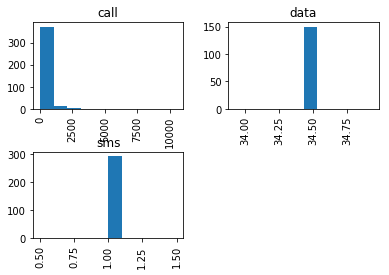

In [38]:
df.duration.hist(by=df.item)
plt.show()

In [24]:
import numpy as np
from functools import reduce

def test_sum(series):
    return reduce(lambda x, y: x + y/2, series)  # y is the relevant variable that should be calculated on
        
df.groupby('network').agg({'duration':test_sum})

,duration
network,
Meteor,3628.0000
Tesco,6922.5000
Three,18576.5000
Vodafone,7391.5000
data,2599.3895
landline,9219.5000
special,2.0000
voicemail,897.0000
world,4.0000
